In [183]:
import pandas as pd

In [184]:
data = pd.read_csv('/content/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [185]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

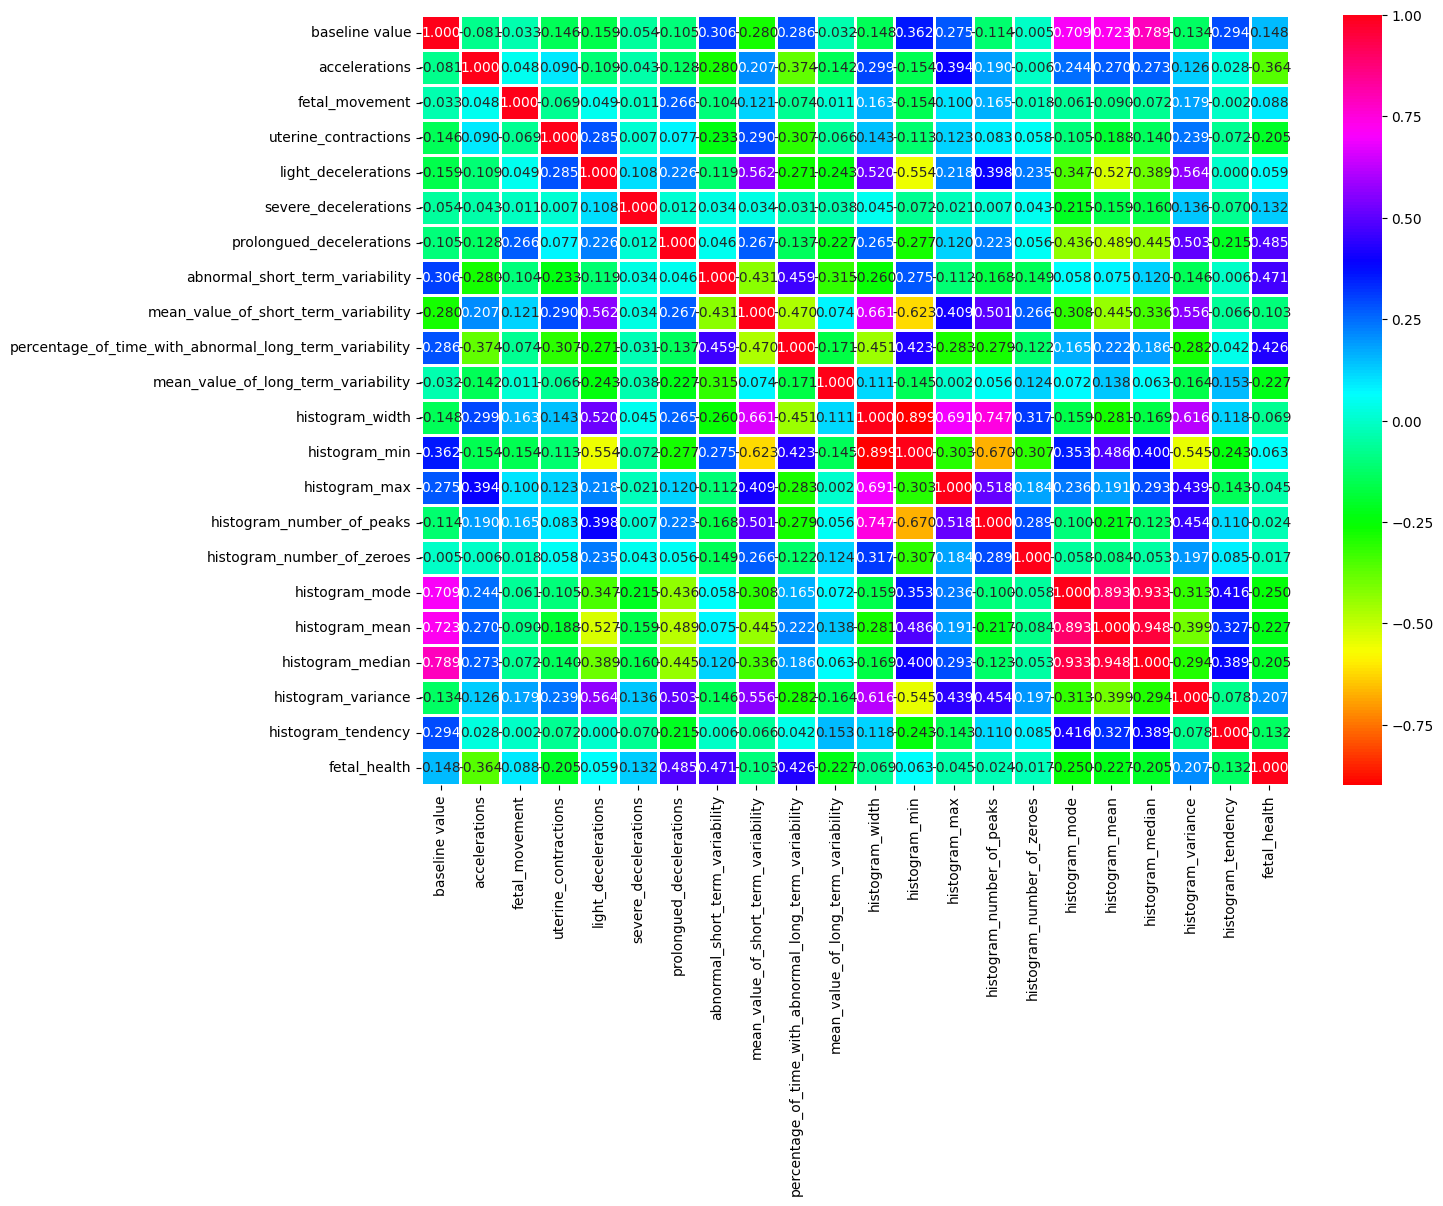

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [187]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D,Conv2D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [188]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.utils import to_categorical

In [189]:
X = data.drop('fetal_health', axis=1)
Y = pd.get_dummies(data['fetal_health'])

In [190]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [191]:
X.shape

(2126, 21)

In [192]:
Y.shape

(2126, 3)

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [195]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [196]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [197]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=32, epochs=6)

Epoch 1/6
43/43 [==============================] - 3s 17ms/step - loss: 0.7974 - precision_14: 0.7893 - recall_14: 0.4765 - val_loss: 0.5553 - val_precision_14: 0.8142 - val_recall_14: 0.8118
Epoch 2/6
43/43 [==============================] - 0s 7ms/step - loss: 0.5818 - precision_14: 0.8345 - recall_14: 0.6750 - val_loss: 0.4095 - val_precision_14: 0.8914 - val_recall_14: 0.8206
Epoch 3/6
43/43 [==============================] - 0s 9ms/step - loss: 0.5159 - precision_14: 0.8470 - recall_14: 0.7162 - val_loss: 0.3544 - val_precision_14: 0.9150 - val_recall_14: 0.8235
Epoch 4/6
43/43 [==============================] - 0s 6ms/step - loss: 0.4471 - precision_14: 0.8639 - recall_14: 0.7375 - val_loss: 0.3286 - val_precision_14: 0.9295 - val_recall_14: 0.8147
Epoch 5/6
43/43 [==============================] - 0s 6ms/step - loss: 0.4190 - precision_14: 0.8864 - recall_14: 0.7346 - val_loss: 0.3181 - val_precision_14: 0.9180 - val_recall_14: 0.8235
Epoch 6/6
43/43 [===========================

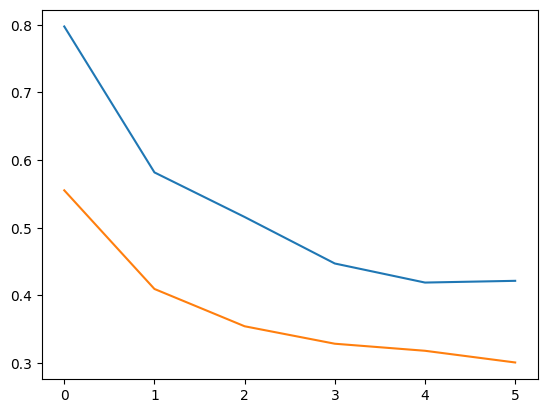

In [198]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [199]:
preds = model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


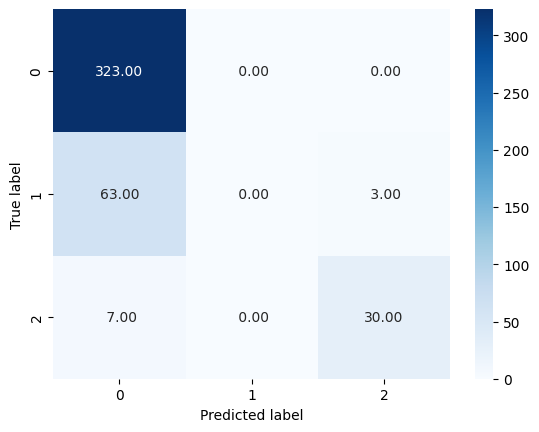

In [200]:
confmat = confusion_matrix(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1))
sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [201]:
print(classification_report(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       323
           1       0.00      0.00      0.00        66
           2       0.91      0.81      0.86        37

    accuracy                           0.83       426
   macro avg       0.58      0.60      0.59       426
weighted avg       0.70      0.83      0.76       426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
